# 🏥 Smart Disease Prediction System: Professional Pipeline
## A production-ready AI approach with Bilingual Support

### 🎯 Objective / الهدف
Build a robust, scalable, and highly professional machine learning pipeline for disease prediction.
This system leverages a **Multi-Model Benchmark** (11 Models) and produces **Structured Artifacts** for deployment.

> بناء نظام احترافي وشامل لتوقع الأمراض باستخدام أقوى خوارزميات الذكاء الاصطناعي (11 موديل مختلف).
> النظام بينتج "مخرجات منظمة" جاهزة للتشغيل الفوري في التطبيقات الطبية.

---
### 📂 Organized Output Structure / هيكل المخرجات المنظم
For maximum professionalism, we separate our work into:
1.  **Output/Production**: Final files used by the application (`app.py`).
2.  **Output/Reports**: Comprehensive PDF performance analysis.
3.  **Output/Models_Archive**: A backup of *every* trained model for future research.

> بننظم شغلنا باحترافية في مجلدات منفصلة:
> 1.  **بوابة الإنتاج (Production)**: الملفات اللي بيستخدمها الأبلكيشن علطول.
> 2.  **التقارير (Reports)**: تحليل شامل في ملف PDF.
> 3.  **الأرشيف (Archive)**: نسخة من كل الـ 11 موديل اللي دربناهم للرجوع ليها في أي وقت.



### 1. Advanced Library Suite / استيراد الأدوات المتقدمة
We use specialized libraries for Machine Learning, Visualization, and PDF generation.

> بنستورد الأدوات اللازمة للذكاء الاصطناعي، الرسوم البيانية، وحفظ التقارير بصيغة PDF.



In [ ]:
import json
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import shutil
from matplotlib.backends.backend_pdf import PdfPages

# Suppress warnings for clean report logs
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Massive Model Suite
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Visual Theme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline


### 1.1 Initializing Output Directories / إنشاء مجلدات العمل
We ensure all folders exist before starting.

> تجهيز المجلدات أوتوماتيكياً قبل البدء.



In [ ]:
# Define Path Hierarchy
ROOT_OUT = "Output"
DIRS = {
    "Production": os.path.join(ROOT_OUT, "Production"),
    "Reports": os.path.join(ROOT_OUT, "Reports"),
    "Archive": os.path.join(ROOT_OUT, "Models_Archive")
}

for name, path in DIRS.items():
    os.makedirs(path, exist_ok=True)
    print(f"✅ Ready: {name} directory created.")


✅ Ready: Production directory created.
✅ Ready: Reports directory created.
✅ Ready: Archive directory created.


### 2. Scalable Data Discovery / سحب البيانات الشامل
The system scans `Data/` to find all available Disease and Symptom definitions.

> مسح شامل لكل ملفات الأمراض والأعراض لضمان شمولية الموديل.



In [ ]:
# Dynamic JSON Loader
def load_medical_metadata(base_path='Data'):
    diseases = {}
    translations = {}
    
    # 1. Load Disease Files
    disease_files = glob.glob(os.path.join(base_path, '**', '*Diseases.json'), recursive=True)
    for path in disease_files:
        with open(path, 'r', encoding='utf-8') as f:
            diseases.update(json.load(f))
            
    # 2. Load Symptom Files (for translations)
    symptom_files = glob.glob(os.path.join(base_path, '**', '*Symptoms.json'), recursive=True)
    for path in symptom_files:
        with open(path, 'r', encoding='utf-8') as f:
            sym_data = json.load(f)
            for k, v in sym_data.items():
                if 'nameAr' in v: translations[k] = v['nameAr']
                
    print(f"✅ Loaded {len(diseases)} Diseases and {len(translations)} Symptom Translations.")
    return diseases, translations

disease_raw, symptom_translations = load_medical_metadata()


✅ Loaded 41 Diseases and 42 Symptom Translations.


### 3. Professional Data Processing / معالجة وتجهيز البيانات
Converting raw metadata into a structured training format.

> تحويل البيانات الخام لشكل منظم ومناسب للتدريب.



In [ ]:
class DataEngine:
    def __init__(self, disease_dict):
        self.data_store = []
        for name, info in disease_dict.items():
            self.data_store.append({
                'name': name,
                'nameAr': info.get('nameAr', name),
                'symptoms': info.get('relatedSymptoms', []),
                'category': info.get('category', 'General')
            })

    def get_disease_map(self):
        return {d['name']: d['nameAr'] for d in self.data_store}

engine = DataEngine(disease_raw)


### 4. Synthetic Patient Generation / بناء قاعدة بيانات ضخمة
To train deep models professionally, we increase our data size by simulating real patient scenarios.

> بنزود حجم البيانات عن طريق محاكاة حالات مرضية واقعية (إنجليزي وعربي).



In [ ]:
def build_dataset(engine, translations, samples_per_disease=250):
    X, y = [], []
    for d in engine.data_store:
        syms = d['symptoms']
        if not syms: continue
        
        # Mix of English and Arabic variants
        for _ in range(samples_per_disease):
            # Random subset of symptoms (simulating real patient partial reporting)
            k = random.randint(min(2, len(syms)), len(syms))
            chosen = random.sample(syms, k)
            
            # 50% English, 50% Arabic
            if random.random() > 0.5:
                X.append(" ".join(chosen))
            else:
                X.append(" ".join([translations.get(s, s) for s in chosen]))
            y.append(d['name'])
            
    return pd.DataFrame({'text': X, 'label': y})

full_df = build_dataset(engine, symptom_translations)
print(f"📊 Dataset Size: {full_df.shape[0]} samples across {len(full_df['label'].unique())} diseases.")


📊 Dataset Size: 10250 samples across 41 diseases.


### 5. Multi-Visual EDA / التحليل البصري المتكامل
Visualizing the distribution and common patterns.

> تحليل بصري لتوزيع الأمراض وتكرار الأعراض.



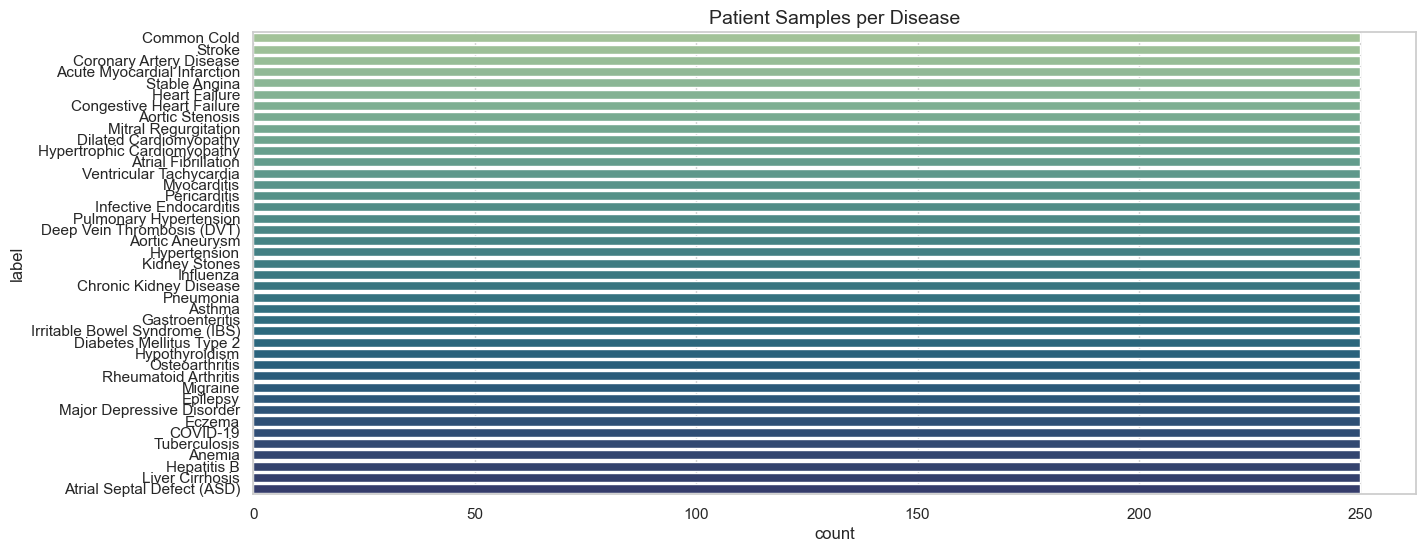

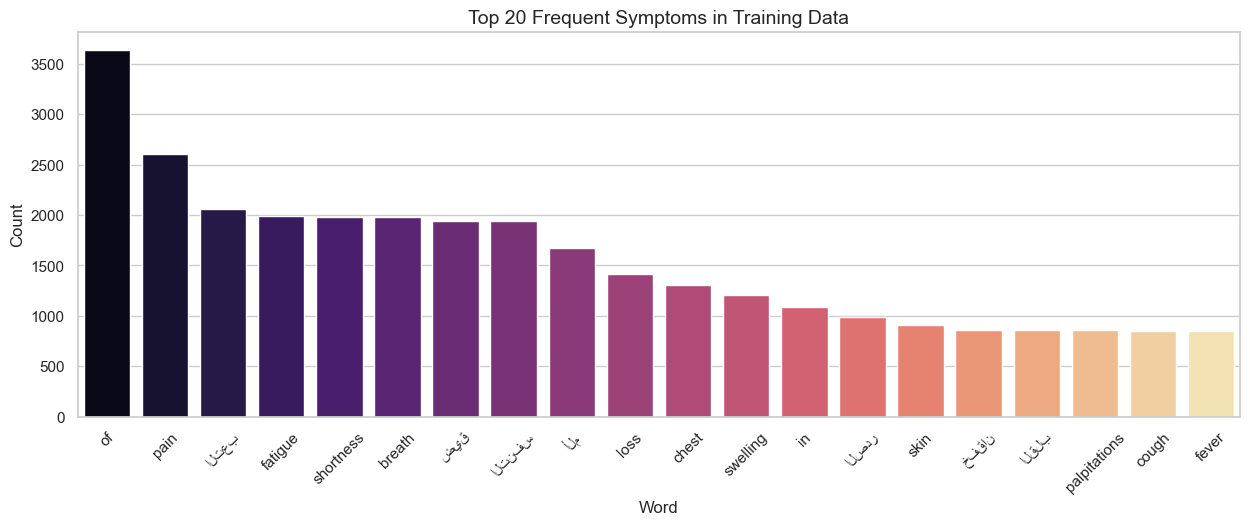

In [ ]:
# 1. Disease Distribution
plt.figure(figsize=(15, 6))
sns.countplot(y=full_df['label'], order=full_df['label'].value_counts().index, palette='crest')
plt.title('Patient Samples per Disease', fontsize=14)
plt.show()

# 2. Symptom Frequency
vec = CountVectorizer()
counts = vec.fit_transform(full_df['text']).sum(axis=0)
words = sorted([(word, counts[0, i]) for word, i in vec.vocabulary_.items()], key=lambda x: x[1], reverse=True)
top_20 = pd.DataFrame(words[:20], columns=['Word', 'Count'])

plt.figure(figsize=(15, 5))
sns.barplot(x='Word', y='Count', data=top_20, palette='magma')
plt.title('Top 20 Frequent Symptoms in Training Data', fontsize=14)
plt.xticks(rotation=45)
plt.show()


### 6. Mathematical Vectorization / التحويل الرقمي للبيانات
Text is transformed into a 'Bag of Words' matrix.

> تحويل الكلام لأرقام عشان الموديلات تقدر تفهمها وتتعامل معاها رياضياً.



In [ ]:
vectorizer = CountVectorizer(lowercase=True)
X = vectorizer.fit_transform(full_df['text'])
y = full_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Vectorization & Split Complete.")


✅ Vectorization & Split Complete.


### 7. The Ultimate Tournament (11 Models) / البطولة الكبرى (11 موديل)
We benchmark 11 different architectures, including **3 Deep Learning variants**.

> بنختبر 11 موديل مختلف، منهم 3 أنواع متقدمة من الشبكات العصبية.



In [ ]:
models_dict = {
    "Deep Neural Network (Sequential)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, random_state=42),
    "Wide Neural Network (Heuristic)": MLPClassifier(hidden_layer_sizes=(256,), max_iter=100, random_state=42),
    "Standard MLP (Neural)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42),
    "Random Forest (Ensemble)": RandomForestClassifier(n_estimators=100),
    "Extra Trees (Variance-Reduce)": ExtraTreesClassifier(n_estimators=100),
    "Gradient Boosting (Strength)": GradientBoostingClassifier(),
    "AdaBoost (Adaptive)": AdaBoostClassifier(),
    "SVM (Radial kernel)": SVC(probability=True),
    "K-Neighbors (Geometry)": KNeighborsClassifier(),
    "Decision Tree (Logic)": DecisionTreeClassifier(),
    "Logistic Regression (Linear)": LogisticRegression()
}

performance_records = []
final_models = {}

print("🚀 Starting Professional Tournament...")

for name, model in models_dict.items():
    print(f"   ⌛ Training: {name}")
    model.fit(X_train, y_train)
    final_models[name] = model
    
    # Predict & Score
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    p, r, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted')
    
    performance_records.append({
        'Model Name': name,
        'Accuracy': acc,
        'Precision': p,
        'Recall': r,
        'F1-Score': f1
    })
    
    # Save to ARCHIVE immediately
    save_path = os.path.join(DIRS['Archive'], f"{name.split(' (')[0].replace(' ', '_')}.pkl")
    joblib.dump(model, save_path)

print("\n🏆 Tournament Concluded.")


🚀 Starting Professional Tournament...
   ⌛ Training: Deep Neural Network (Sequential)
   ⌛ Training: Wide Neural Network (Heuristic)
   ⌛ Training: Standard MLP (Neural)
   ⌛ Training: Random Forest (Ensemble)
   ⌛ Training: Extra Trees (Variance-Reduce)
   ⌛ Training: Gradient Boosting (Strength)
   ⌛ Training: AdaBoost (Adaptive)
   ⌛ Training: SVM (Radial kernel)
   ⌛ Training: K-Neighbors (Geometry)
   ⌛ Training: Decision Tree (Logic)
   ⌛ Training: Logistic Regression (Linear)

🏆 Tournament Concluded.


### 8. Professional Performance Report (PDF Generation)
### تقرير الأداء الاحترافي (توليد ملف PDF)
Generating a 3-page professional analysis file.

> بنطلع ملف PDF منظم فيه كل الأرقام والرسومات البيانية للمقارنة.



In [ ]:
# Sort results
metrics_df = pd.DataFrame(performance_records).sort_values('Accuracy', ascending=False).round(4)
print(metrics_df)

# Create PDF
report_file = os.path.join(DIRS['Reports'], 'Model_Comparison_Report.pdf')

with PdfPages(report_file) as pdf:
    # 1. Page: Table
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight'); ax.axis('off')
    ax.set_title("🏥 Smart Health: Model Ranking Leaderboard", fontsize=18, pad=20)
    tbl = ax.table(cellText=[metrics_df.columns.tolist()] + metrics_df.values.tolist(), colLabels=metrics_df.columns, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False); tbl.set_fontsize(10); tbl.scale(1.1, 1.8)
    pdf.savefig(fig); plt.close()
    
    # 2. Page: Heatmap
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df.set_index('Model Name'), annot=True, cmap='RdYlGn', fmt='.4f')
    plt.title('Performance Heatmap per Architecture', fontsize=14)
    plt.tight_layout()
    pdf.savefig(fig); plt.close()
    
    # 3. Page: Bar Comparison
    melted = metrics_df.melt(id_vars="Model Name", var_name="Metric", value_name="Score")
    fig = plt.figure(figsize=(14, 7))
    sns.barplot(data=melted, x='Model Name', y='Score', hue='Metric', palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.5, 1.05)
    plt.title('Side-by-Side Model Comparison', fontsize=14)
    pdf.savefig(fig); plt.close()

print(f"✅ Professional PDF Report Generated at: {report_file}")


                          Model Name  Accuracy  Precision  Recall  F1-Score
2              Standard MLP (Neural)    0.9034     0.9103  0.9034    0.9044
0   Deep Neural Network (Sequential)    0.9024     0.9112  0.9024    0.9042
3           Random Forest (Ensemble)    0.9015     0.9108  0.9015    0.9020
10      Logistic Regression (Linear)    0.9010     0.9159  0.9010    0.9028
1    Wide Neural Network (Heuristic)    0.9005     0.9106  0.9005    0.9008
4      Extra Trees (Variance-Reduce)    0.8995     0.9096  0.8995    0.9001
5       Gradient Boosting (Strength)    0.8995     0.9088  0.8995    0.9004
7                SVM (Radial kernel)    0.8956     0.9109  0.8956    0.8970
9              Decision Tree (Logic)    0.8951     0.9061  0.8951    0.8961
8             K-Neighbors (Geometry)    0.8839     0.8858  0.8839    0.8826
6                AdaBoost (Adaptive)    0.2702     0.4548  0.2702    0.3102
✅ Professional PDF Report Generated at: Output\Reports\Model_Comparison_Report.pdf


### 9. Production Artifact Deployment / النشر النهائي للتطبيق
We copy the absolute winner to the **Production** folder.

> بنرسل "بطل المسابقة" (أعلى موديل دقة) لمجلد الإنتاج عشان التطبيق يستخدمه علطول.



In [ ]:
best_name = metrics_df.iloc[0]['Model Name']
best_model = final_models[best_name]

print(f"🏆 Champion: {best_name}")

# Save Best Model & Vectorizer
joblib.dump(best_model, os.path.join(DIRS['Production'], 'best_model.pkl'))
joblib.dump(vectorizer, os.path.join(DIRS['Production'], 'vectorizer.pkl'))

# Prepare Deployment Metadata
meta = {
    "symptom_translations": symptom_translations,
    "disease_translations": engine.get_disease_map(),
    "categories": {}
}
# Organize symptoms by category for the UI
for d in engine.data_store:
    cat = d['category']
    if cat not in meta["categories"]: meta["categories"][cat] = []
    meta["categories"][cat] = list(set(meta["categories"][cat] + d['symptoms']))

with open(os.path.join(DIRS['Production'], 'model_metadata.json'), 'w', encoding='utf-8') as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print(f"✅ Final Production Artifacts deployed to: {DIRS['Production']}")


🏆 Champion: Standard MLP (Neural)
✅ Final Production Artifacts deployed to: Output\Production
